In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyGSI.diags import Radiance

file = '/scratch2/NCEPDEV/stmp1/Kevin.Dougherty/ncDiags/gdas.20200922/00/atmos/diag_amsua_metop-a_ges.2020092200.nc4'

# Create diag object
diag = Radiance(file)

# Create dataframe
df = diag.get_data(channel=[11], qcflag=[0])

latitude = df['latitude'].to_numpy()
longitude = df['longitude'].to_numpy()
hofx_wo_bc = df['hofx_unadjusted'].to_numpy()
obs = df['observation'].to_numpy()
omf_w_bc = df['omf_adjusted'].to_numpy()


/scratch1/NCEPDEV/da/Kevin.Dougherty/anaconda3/envs/UFO/lib/python3.7/site-packages/shapefile.py:385: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


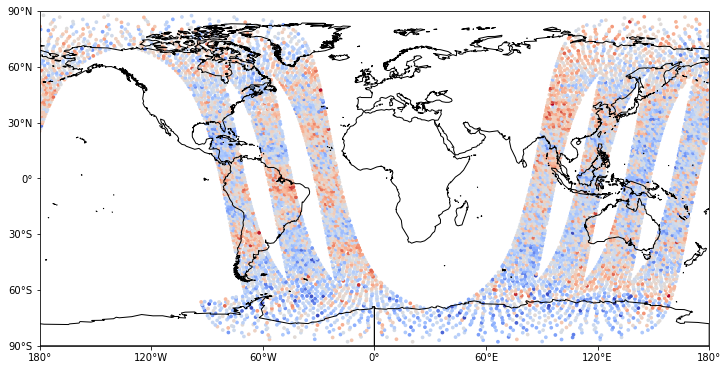

In [2]:
from emcpy.plots.map_tools import Domain, MapProjection
from emcpy.plots.map_plots import MapScatter
from emcpy.plots.create_plots import CreateMap

# Create scatter plot on global domian
mymap = CreateMap(figsize=(12, 8),
                  domain=Domain('global'),
                  proj_obj=MapProjection('plcarr'))

# Add coastlines
mymap.add_features(['coastlines'])

# Create EMCPy object
scatterobj = MapScatter(latitude=latitude,
                        longitude=longitude,
                        data=omf_w_bc)
scatterobj.cmap = 'coolwarm'
scatterobj.vmin = -1
scatterobj.vmax = 1

# Draw data onto map
mymap.draw_data([scatterobj])

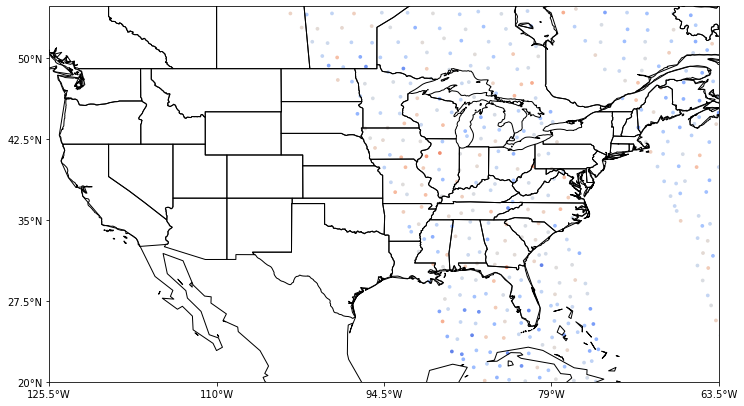

In [4]:
# Create scatter plot on global domian
mymap = CreateMap(figsize=(12, 8),
                  domain=Domain('conus'),
                  proj_obj=MapProjection('plcarr'))

# Add coastlines
mymap.add_features(['coastlines', 'states'])

# Create EMCPy object
scatterobj = MapScatter(latitude=latitude,
                        longitude=longitude,
                        data=omf_w_bc)
scatterobj.cmap = 'coolwarm'
scatterobj.vmin = -1
scatterobj.vmax = 1

# Draw data onto map
mymap.draw_data([scatterobj])

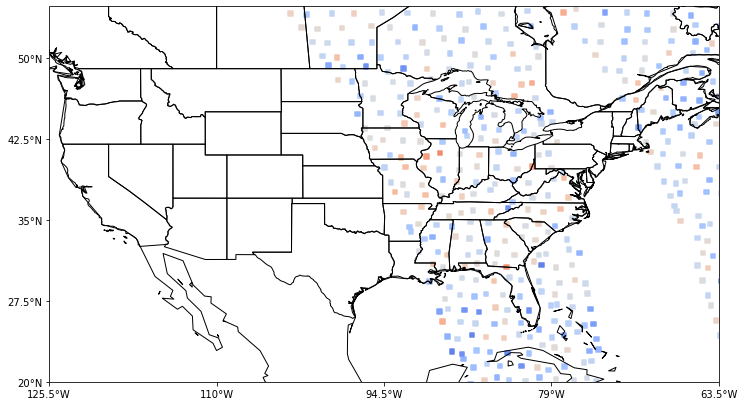

In [9]:
# Create scatter plot on global domian
mymap = CreateMap(figsize=(12, 8),
                  domain=Domain('conus'),
                  proj_obj=MapProjection('plcarr'))

# Add coastlines
mymap.add_features(['coastlines', 'states'])

# Create EMCPy object
scatterobj = MapScatter(latitude=latitude,
                        longitude=longitude,
                        data=omf_w_bc)
scatterobj.cmap = 'coolwarm'
scatterobj.vmin = -1
scatterobj.vmax = 1
scatterobj.markersize = 20
scatterobj.marker = 's'

# Draw data onto map
mymap.draw_data([scatterobj])

In [8]:
scatterobj.__dict__

{'plottype': 'map_scatter',
 'latitude': array([-85.3506, -83.9942, -82.7153, ..., -38.7136, -37.3502, -35.9836],
       dtype=float32),
 'longitude': array([  6.7782,   4.2907,   3.8359, ..., 352.4179, 351.8207, 351.2454],
       dtype=float32),
 'data': array([-0.0807903 , -0.5132244 ,  0.37645218, ...,  0.47875547,
         0.57766443,  0.5458071 ], dtype=float32),
 'marker': 'o',
 'markersize': 20,
 'cmap': 'coolwarm',
 'linewidths': 1.5,
 'edgecolors': None,
 'alpha': None,
 'vmin': -1,
 'vmax': 1,
 'label': None,
 'colorbar': True}